In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

wandb: Appending key for api.wandb.ai to your netrc file: /Users/guydavidson/.netrc
Successfully logged in to Weights & Biases!


In [13]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches, ticker
from matplotlib import path as mpath
import matplotlib.gridspec as gridspec

import pickle
import tabulate
import wandb
from collections import namedtuple

import meta_learning_data_analysis as analysis
import meta_learning_analysis_plots as plots

In [4]:
np.set_printoptions(linewidth=160)
# Avoid escaping any latex characters
tabulate.LATEX_ESCAPE_RULES = {}

MIN_FONT_SIZE = 14
LABELS_FONT_SIZE = 20
TITLE_FONT_SIZE = 24

matplotlib.rcParams.update({'font.size': MIN_FONT_SIZE})
FONT_DICT = dict(fontsize=LABELS_FONT_SIZE) 
TITLE_FONT_DICT = dict(fontsize=TITLE_FONT_SIZE)

PER_PLOT_WIDTH = 6

QUERY_ORDINAL_POSITION_COMORLAP= 'cool'
NUM_TIMES_TRAINED_COLORMAP = 'copper'

In [10]:
cache = analysis.refresh_cache()
print(cache.keys())

six_replications_analyses = cache['six_replications_analyses']
# query_mod_replications = cache['query_mod_replications']
control_analyses = cache['control_analyses']
six_replications_updated_analyses = cache['six_replications_updated_analyses']
control_updated_analyses = cache['updated_control_analyses']
query_mod_updated_analyses = cache['query_mod_updated_analyses']
forgetting_curves_raw_data = cache['forgetting_curves_raw_data']
forgetting_exp_decay_params = cache['forgetting_exp_decay_params']

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data', 'preliminary_maml_analyses', 'baseline_maml_comparison_analyses', 'maml_analyses', 'maml_alpha_0_analyses', 'maml_meta_test_analyses', 'balanced_batches_analyses', 'baseline_total_curve_analyses', 'control_total_curve_analyses', 'query_mod_total_curve_analyses', 'simultaneous_training_analyses', 'per_task_simultaneous_training_analyses', 'task_conditional_analyses', 'task_conditional_multiplicative_only_analyses', 'task_conditional_additive_only_analyses', 'task_conditional_weights', 'task_conditional_multiplicative_only_weights', 'task_conditional_additive_only_weights', 'forgetting_exp_decay_params'])


# Combined Figure

log(y) = -1.603 log(x) + 11.71
log(y) = -0.447 log(x) + 12.3
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/cogsci/cogsci_combined_figure_python.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-cogsci-cogsci-combined-figure-python}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/cogsci/cogsci_combined_figure_python.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-cogsci-cogsci-combined-figure-python}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



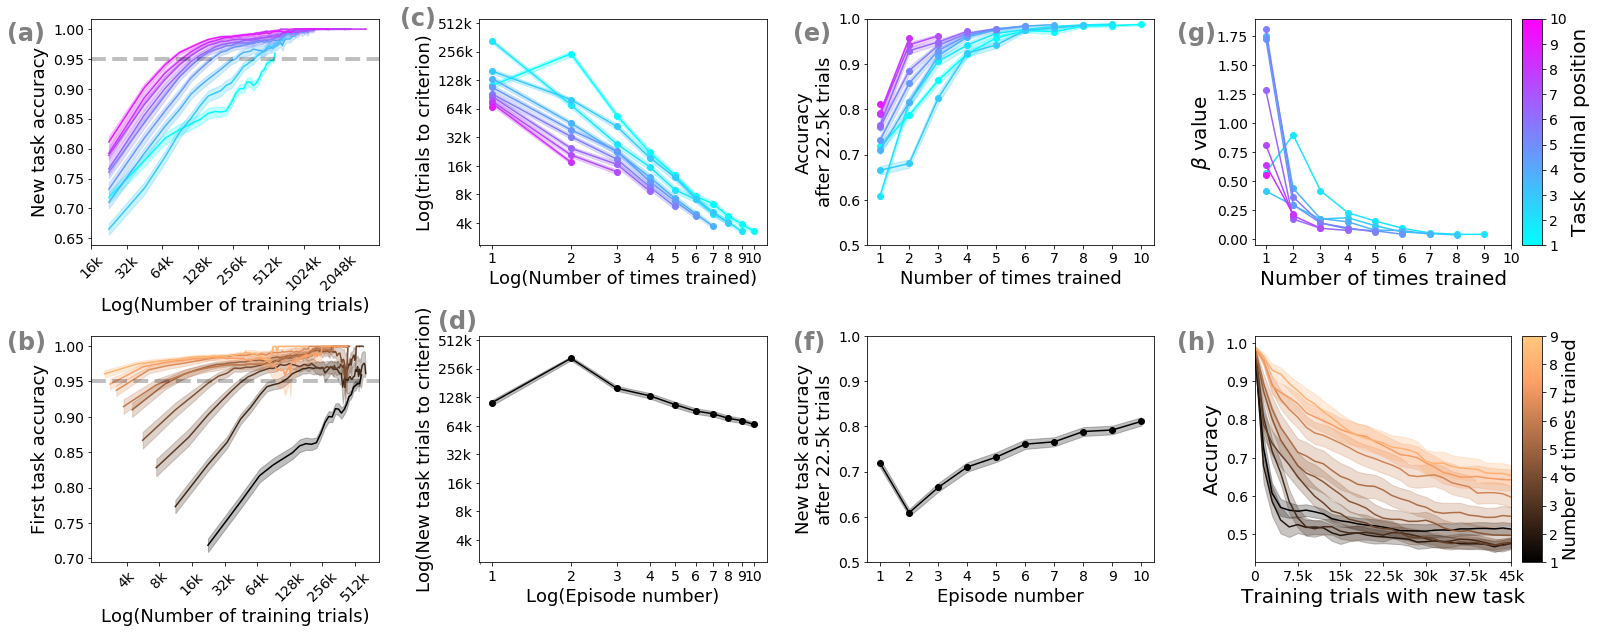

In [27]:
NROWS = 2
NCOLS = 4
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 10

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)


raw_accuracy_axes = (plt.subplot(NROWS, NCOLS, 1), plt.subplot(NROWS, NCOLS, NCOLS + 1))
plots.both_raw_accuracy_plots(six_replications_analyses, '',
                              shade_error=True, font_dict=multi_plot_font_dict, log_x=True,
                              new_task_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                              first_task_colormap=NUM_TIMES_TRAINED_COLORMAP, title_font_dict=title_font_dict,
                              hline_y=0.95, first_task_title='', new_task_title='', add_colorbars=False,
                              external_axes=raw_accuracy_axes)


examples_to_criterion_axes = (plt.subplot(NROWS, NCOLS, 2), plt.subplot(NROWS, NCOLS, NCOLS + 2))
LOG_PLOT_YLIM = (7.75, 13.25)
plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            # num_tasks_trained_highlight_first_time='highlight', 
                                            add_colorbars=False,
                                            title_font_dict=TITLE_FONT_DICT, external_axes=examples_to_criterion_axes,
                                            plot_regression='print', num_tasks_to_plot_tasks_trained=1,
                                            tasks_trained_y_label='Log(New task trials to criterion)')


accuracy_22point5k_axes = (plt.subplot(NROWS, NCOLS, 3), plt.subplot(NROWS, NCOLS, NCOLS + 3))
ACCURACY_PLOT_YLIM = (0.5, 1.0)
plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=3, 
                                            title='', #'New episode, 22.5k accuracy, baseline model',
                                            sem_n=(60, 60, 60, 180), shade_error=True, ylim=ACCURACY_PLOT_YLIM, 
                                            plot_y_label='Accuracy\nafter 22.5k trials',
                                            tasks_trained_y_label='New task accuracy\nafter 22.5k trials',
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            # num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, num_tasks_to_plot_tasks_trained=1,
                                            external_axes=accuracy_22point5k_axes, add_colorbars=False)

(new_task_beta_ax, first_task_acc_ax) = (plt.subplot(NROWS, NCOLS, 4), plt.subplot(NROWS, NCOLS, NCOLS + 4))

plots.plot_processed_results_all_dimensions(wrap_values_for_plotting(forgetting_exp_decay_params), data_index=1,
                                            title='', 
                                            # ylim=ACCURACY_PLOT_YLIM, 
                                            plot_y_label='$\\beta$ value',
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(0,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=title_font_dict, external_axes=(new_task_beta_ax, None)
                                           )

first_task_colormap = plt.get_cmap(NUM_TIMES_TRAINED_COLORMAP)

for episode_num in range(1, num_tasks):
    first_task_times_trained = episode_num - 1
    episode_first_task = forgetting_curves_raw_data[:, first_task_times_trained, episode_num]
    x_values = np.arange(episode_first_task.shape[1])
    mean = np.nanmean(episode_first_task, axis=0)
    std = np.nanstd(episode_first_task, axis=0)
    n = episode_first_task.shape[1] - np.isnan(episode_num).sum(axis=0)
    sem = np.divide(std, n ** 0.5)
    color = first_task_colormap((episode_num - 1) / (num_tasks - 1))
    
    first_task_acc_ax.plot(x_values, mean, color=color) 
    first_task_acc_ax.fill_between(x_values, mean - sem, mean + sem, color=color, alpha=0.25)
    
    
xticks = np.arange(0, 35, 5)
first_task_acc_ax.set_xticks(xticks) 
def format_func(x, pos):
    val = x * 1500
    if int(val) == 0:
        return '0'
    
    if val % 1000 == 0:
        return f'{val / 1000:n}k'
    
    return f'{val / 1000:.1f}k'
first_task_acc_ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
# first_task_acc_ax.set_xticklabels([int(1500 * x) for x in xticks])
first_task_acc_ax.set_xlim(xticks[0], xticks[-1])

first_task_acc_ax.set_xlabel('Training trials with new task', **FONT_DICT)
first_task_acc_ax.set_ylabel('Accuracy', **FONT_DICT)

plots.add_colorbar_to_axes(first_task_acc_ax, first_task_colormap, vmax=9, y_label=plots.NUM_TIMES_TRAINED_LABEL, 
                           y_label_font_dict=multi_plot_font_dict)



# TODO: fix text positions

TEXT_POSITIONS = [(0.08, 0.85), (0.08, 0.42),
                  (0.29, 0.87), (0.31, 0.45),
                  (0.5, 0.85), (0.5, 0.42),
                  (0.705, 0.85), (0.705, 0.42)]

subfigure_text_font_dict = FONT_DICT.copy()
subfigure_text_font_dict['fontsize'] += 4
subfigure_text_font_dict['color'] = '#808080'
subfigure_text_font_dict['weight'] = 'bold'

num_subfigures = len(TEXT_POSITIONS)
for i in range(num_subfigures):
    pos = TEXT_POSITIONS[i]
    plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
             subfigure_text_font_dict, transform=figure.transFigure)


plots.save('cogsci/cogsci_combined_figure_python.pdf')
plt.show()

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/cogsci/forgetting_panel.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-cogsci-forgetting-panel}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/cogsci/forgetting_panel.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-cogsci-forgetting-panel}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



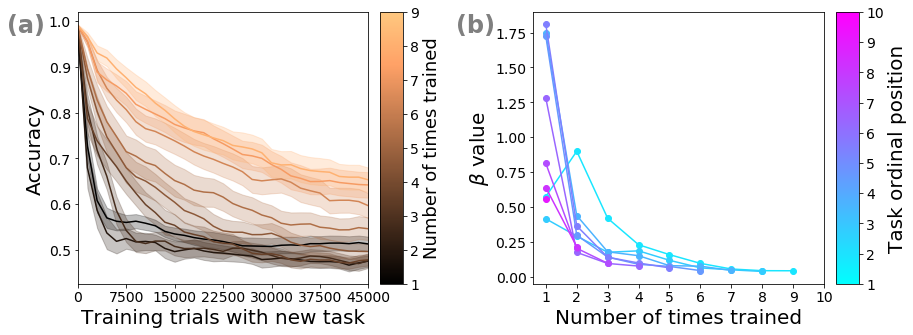

In [11]:
DEFAULT_NAMES = ('alpha', 'beta')

def wrap_values_for_plotting(values, names=DEFAULT_NAMES):
    return [ [analysis.ResultSet(name=names[i], mean=values[i,:,:]) 
              for i in range(values.shape[0])] ]

NROWS = 1
NCOLS = 2
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 16

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.3, wspace=0.4)


num_tasks = 10
new_task_colormap = plt.get_cmap(QUERY_ORDINAL_POSITION_COMORLAP)
first_task_colormap = plt.get_cmap(NUM_TIMES_TRAINED_COLORMAP)

first_task_ax = plt.subplot(NROWS, NCOLS, 1)

for episode_num in range(1, num_tasks):
    first_task_times_trained = episode_num - 1
    episode_first_task = forgetting_curves_raw_data[:, first_task_times_trained, episode_num]
    x_values = np.arange(episode_first_task.shape[1])
    mean = np.nanmean(episode_first_task, axis=0)
    std = np.nanstd(episode_first_task, axis=0)
    n = episode_first_task.shape[1] - np.isnan(episode_num).sum(axis=0)
    sem = np.divide(std, n ** 0.5)
    color = first_task_colormap((episode_num - 1) / (num_tasks - 1))
    
    first_task_ax.plot(x_values, mean, color=color) 
    first_task_ax.fill_between(x_values, mean - sem, mean + sem, color=color, alpha=0.25)
    
    
xticks = np.arange(0, 35, 5)
first_task_ax.set_xticks(xticks) 
first_task_ax.set_xticklabels([int(1500 * x) for x in xticks])
first_task_ax.set_xlim(xticks[0], xticks[-1])

first_task_ax.set_xlabel('Training trials with new task', **FONT_DICT)
first_task_ax.set_ylabel('Accuracy', **FONT_DICT)

plots.add_colorbar_to_axes(first_task_ax, first_task_colormap, vmax=9, y_label=plots.NUM_TIMES_TRAINED_LABEL, 
                           y_label_font_dict=multi_plot_font_dict)

axes = (plt.subplot(NROWS, NCOLS, 2), None)
plots.plot_processed_results_all_dimensions(wrap_values_for_plotting(forgetting_exp_decay_params), data_index=1,
                                            title='', 
                                            # ylim=ACCURACY_PLOT_YLIM, 
                                            plot_y_label='$\\beta$ value',
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(0,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            #save_path='workshop/22point5k_examples_accuracy.pdf'
                                           )


TEXT_POSITIONS = [(0.055, 0.825), (0.5, 0.825)]

subfigure_text_font_dict = FONT_DICT.copy()
subfigure_text_font_dict['fontsize'] += 4
subfigure_text_font_dict['color'] = '#808080'
subfigure_text_font_dict['weight'] = 'bold'

for i in range(len(TEXT_POSITIONS)):
    pos = TEXT_POSITIONS[i]
    plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
             subfigure_text_font_dict, transform=figure.transFigure)

plots.save('cogsci/forgetting_panel.pdf')
plt.show()